## Exploring trade-off between house price and age in Boston dataset
Generally, there is a trade-off between house price and age. But you may want to buy a ralatively new one as cheap as possible.

Then, what kind of building should we look for?

In this tutorial,

1. Train tow machine learning models for house prices and age usign sklearn.

2. Find out optimal input which achieve low cost and ralatively new building using optga.

### 1. Creating machine learining model
First, create a predictive model for price and age.

Since building a sophisticated predictive model is not the purpose of this tutorial, we will use a simple random forest model without hyperparameter tuning and cross-validation.

In [1]:
#: Load boston housing price datasets
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
df =  pd.DataFrame(boston.data, columns=boston.feature_names)

X = df.drop(["AGE"], 1)
y_price = pd.DataFrame(boston.target, columns=["Price"])
y_age = pd.DataFrame(df["AGE"])


In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33


**Constraints:**

CHAS: [0, 1]

ZN: [0, 100]

RAD: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 24]


In [3]:
#: create predictive model
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

model_price = RandomForestRegressor().fit(X, y_price)
model_age = RandomForestRegressor().fit(X, y_age)

### 2. Optimize input to achive low cost and new building

In [4]:
import optga
from optga.optimizer import Optimizer
optga.__version__

'0.1.3'

In [5]:
optimizer = Optimizer(samples=X)

optimizer.add_objective("Price", model_price, direction="minimize")
optimizer.add_objective("Age", model_age, direction="minimize")

optimizer.add_discrete_constraint("CHAS", [0, 1])
optimizer.add_discrete_constraint("ZN", [0, 100])
optimizer.add_discrete_constraint("RAD", list(range(1, 9)) + [24])

In [6]:
#: confirm optimization config
optimizer.show_config()

{
  "mate": "MateCxTwoPoints",
  "mutate": "MutateUniform",
  "select": "SelectNSGA2",
  "birth_rate": 3,
  "mutpb": 0.2,
  "indpb": 0.1,
  "objectives": {
    "Price": "minimize",
    "Age": "minimize"
  },
  "limits": {
    "CRIM": [
      0.00632,
      88.9762
    ],
    "ZN": [
      0.0,
      100.0
    ],
    "INDUS": [
      0.46,
      27.74
    ],
    "CHAS": [
      0.0,
      1.0
    ],
    "NOX": [
      0.385,
      0.871
    ],
    "RM": [
      3.561,
      8.78
    ],
    "DIS": [
      1.1296,
      12.1265
    ],
    "RAD": [
      1.0,
      24.0
    ],
    "TAX": [
      187.0,
      711.0
    ],
    "PTRATIO": [
      12.6,
      22.0
    ],
    "B": [
      0.32,
      396.9
    ],
    "LSTAT": [
      1.73,
      37.97
    ]
  },
  "discrete_constraints": {
    "CHAS": [
      0,
      1
    ],
    "ZN": [
      0,
      100
    ],
    "RAD": [
      1,
      2,
      3,
      4,
      5,
      6,
      7,
      8,
      24
    ]
  },
  "onehot_groups": null,
  

In [7]:
%time
#: run optimization
optimizer.run(n_gen=300, population_size=500)

(INFO)[2020-01-01 22:32:53,426]
Settings:
None


Wall time: 0 ns
{
  "mate": "MateCxTwoPoints",
  "mutate": "MutateUniform",
  "select": "SelectNSGA2",
  "birth_rate": 3,
  "mutpb": 0.2,
  "indpb": 0.1,
  "objectives": {
    "Price": "minimize",
    "Age": "minimize"
  },
  "limits": {
    "CRIM": [
      0.00632,
      88.9762
    ],
    "ZN": [
      0.0,
      100.0
    ],
    "INDUS": [
      0.46,
      27.74
    ],
    "CHAS": [
      0.0,
      1.0
    ],
    "NOX": [
      0.385,
      0.871
    ],
    "RM": [
      3.561,
      8.78
    ],
    "DIS": [
      1.1296,
      12.1265
    ],
    "RAD": [
      1.0,
      24.0
    ],
    "TAX": [
      187.0,
      711.0
    ],
    "PTRATIO": [
      12.6,
      22.0
    ],
    "B": [
      0.32,
      396.9
    ],
    "LSTAT": [
      1.73,
      37.97
    ]
  },
  "discrete_constraints": {
    "CHAS": [
      0,
      1
    ],
    "ZN": [
      0,
      100
    ],
    "RAD": [
      1,
      2,
      3,
      4,
      5,
      6,
      7,
      8,
      24
    ]
  },
  "onehot_g

(INFO)[2020-01-01 22:32:55,072]
====Generation 0 ====
(INFO)[2020-01-01 22:32:55,072]
         MAX    MIN    Average
Price  44.38   8.19  21.276065
Age    97.63  10.85  71.233975
(INFO)[2020-01-01 22:33:11,501]
====Generation 10 ====
(INFO)[2020-01-01 22:33:11,505]
         MAX    MIN    Average
Price  46.49   5.59  17.691765
Age    95.42  10.72  47.862645
(INFO)[2020-01-01 22:33:27,745]
====Generation 20 ====
(INFO)[2020-01-01 22:33:27,746]
         MAX    MIN    Average
Price  36.63   5.06  10.676200
Age    95.95  10.47  59.153835
(INFO)[2020-01-01 22:33:41,361]
====Generation 30 ====
(INFO)[2020-01-01 22:33:41,361]
         MAX    MIN    Average
Price  33.14   5.06  11.403915
Age    98.19  10.47  59.572075
(INFO)[2020-01-01 22:33:59,031]
====Generation 40 ====
(INFO)[2020-01-01 22:33:59,047]
         MAX   MIN    Average
Price  37.11  5.06  11.461315
Age    97.00  9.33  59.580920
(INFO)[2020-01-01 22:34:15,317]
====Generation 50 ====
(INFO)[2020-01-01 22:34:15,317]
         MAX   MI

### 3.Visualize Result

In [8]:
optimizer.export_result("boston_result")

Overwrite: boston_result


In [9]:
Y_init = pd.read_csv("boston_result/Y_init.csv")
Y_pareto = pd.read_csv("boston_result/Y_pareto.csv")


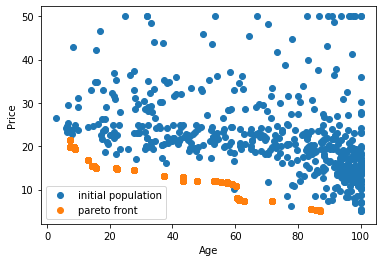

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_age, y_price, label="initial population")
plt.scatter(Y_pareto["Age"], Y_pareto["Price"], label="pareto front")
plt.xlabel("Age")
plt.ylabel("Price")
plt.legend()